# Lecture 14: Linear Regression by Gradient Descent

Today we will learn to minimize the loss function in the linear regression using gradient descent, and the general machine learning workflow:
* Model choosing and set-up.
* Train the model (gradient descent).
* Cross-validation / Testing (MSE, $R^2$).



Again we will import the wine quality data from [UCI machine learning dataset repo on Kaggle](https://www.kaggle.com/uciml/datasets) like we did in last lecture.

* Download `winequality-red.csv` from [https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009/), unzip it and put it in the same directory with this notebook.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
# this will help us plot things nicely
def plot_data_and_line(weight, bias, X, Y):
    # this function plots data against our model
    # weight and bias are our regression model's parameters
    # Conventionally X are our training data, Y are the labels 
    plot_max, plot_min = max(X), min(X)
    XX = np.linspace(plot_min,plot_max,200)
    YY = weight*XX + bias

    plt.scatter(X, Y, alpha=0.1)
    plt.plot(XX, YY, color='red',linewidth = 4, alpha=0.4)
    plt.show()

In [7]:
wine_data = pd.read_csv('winequality-red.csv', sep=';')

In [9]:
fix_acid = wine_data['fixed acidity'].values
vol_acid = wine_data['volatile acidity'].values
ctr_acid = wine_data['citric acid'].values

# Step 1: Model and loss

## Model/Hypothesis
Here we want to investigate the (empirical) relation of citric acid with the fixed acidity.
There are $N$ samples, $i$-th sample has features $x_i$ (citric acid), and a target value $y_i$ (fixed acidity), we want to use the feature(s) to predict the target value(s). Here we use a linear model:
$$h(x; w,b) = wx + b.
$$
Specifically in this example, $h(x_i; w, b) = w x_i + b$, where citric acid as input $x_i$, $w,b$ as parameters, we want this $h$ to be as close to $y_i$ (actual target value) as possible.

## Loss function: 
$$L(w,b; X, y) = \frac{1}{N}\sum_{i=1}^{N} \Big((w x_i + b) - y_i\Big)^2,$$
the $1/N$ factor is added so that statistically we are trying to minimize an expected value of the square error from an empirical distribution.

In [10]:
x = ctr_acid
y = fix_acid
N = len(x)

# be aware that x and y here are both arrays
# model
def h(x, w, b):
    return w * x + b

# loss function = mean square error on the whole data set
def loss(w, b, x, y):
    error = h(x, w, b) - y
    return np.mean(error**2)

# Step 2: training

## Gradient descent to minimize the loss

> Choose initial guess $(w_0,b_0)$ and step size (learning rate) $\eta$<br><br>
>    For $k=0,1,2, \cdots, M$<br><br>
>     &nbsp;&nbsp;&nbsp;&nbsp;   $(w_{k+1},b_{k+1}) =  (w_k,b_k) - \eta\nabla L(w_k,b_k) $

From Lecture 13:
$$\frac{\partial}{\partial b} L(w,b) = \frac{2}{N}  \sum\limits_{i=1}^N \big(w x_i + b-y_i\big) 
=  \frac{2}{N}  \sum\limits_{i=1}^N \big(h(x_i)-y_i\big)$$

$$\frac{\partial}{\partial w} L(w,b) =  \frac{2}{N} \sum\limits_{i=1}^N \big((w x_i + b-y_i) \cdot x_i\big)
= \frac{2}{N} \sum\limits_{i=1}^N \big((h(x_i)-y_i) \cdot x_i\big)$$

In [11]:
def gradient_loss(w,b,x,y):
    dw = 2*np.mean((h(x,w,b)- y)*x)
    db = 2*np.mean(h(x,w,b) - y)
    return dw, db

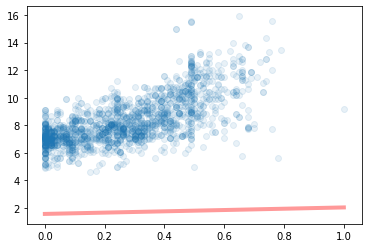

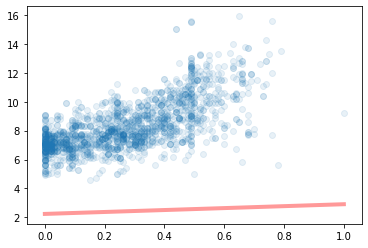

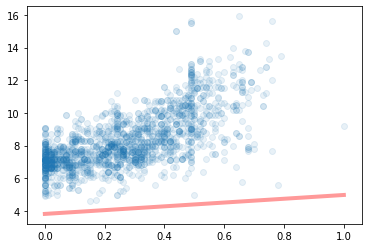

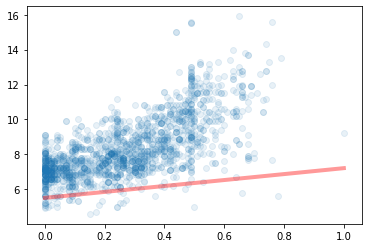

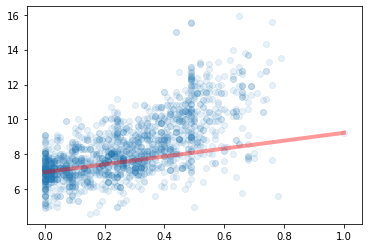

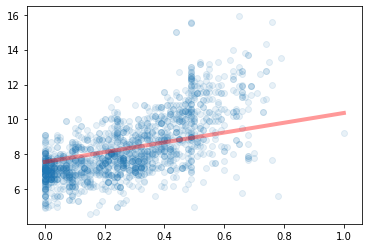

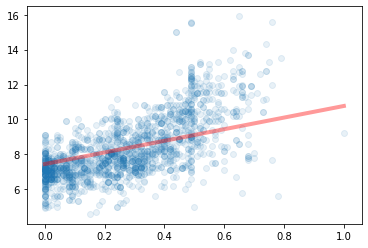

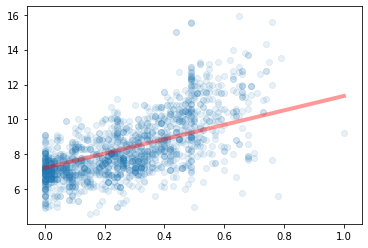

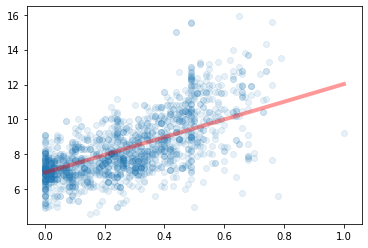

final loss after 500 iterations is:  1.6789165062005091


In [12]:
eta = 0.05  
num_steps = 500

# initial guess
w = 0.0
b = 0.0
loss_at_eachstep = np.zeros(num_steps) # record the change of the loss function
for i in range(num_steps):
    loss_at_eachstep[i] = loss(w,b,x,y)
    dw, db = gradient_loss(w,b,x,y)
    w = w - eta * dw
    b = b - eta * db
    if i in (1, 2, 5, 10, 20, 50, 100, 200, 400):
        plot_data_and_line(w, b, x, y)

print("final loss after", num_steps, "iterations is: ", loss(w,b,x,y))

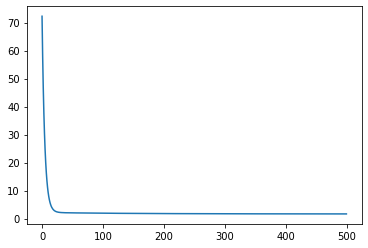

In [13]:
plt.plot(range(num_steps), loss_at_eachstep)
plt.show()

# Step 3: Testing/cross-validation

To make sure our model is able to predict, normally we reserve certain portion of the all the samples as testing/cv set. The training is done for training samples, and we test the model we have trained on the testing samples. 

We can manually split the data using slicing, or using `train_test_split` function from `scikit-learn`'s `model_selection` submodule.

### Metric 1: Mean squared error
$$
\text{MSE}(\mathbf{y}^{\text{Actual}}, \mathbf{y}^{\text{Pred}}) = \frac{1}{n_\text{test}} 
\sum_{i=1}^{n_\text{test}} (y^{\text{Actual}}_i - y^{\text{Pred}}_i)^2.
$$

Remark: training MSE is actually the loss function.

In [14]:
from sklearn.model_selection import train_test_split

### Metric 2: 
Coefficient of determination $R^2$
$$
R^2\Big(\mathbf{y}^{\text{Actual}}, \mathbf{y}^{\text{Pred}}\Big) = 1 - \frac{\displaystyle\sum_{i=1}^{n_{\text{test}}} \left(y^{\text{Actual}}_i - y^{\text{Pred}}_i\right)^2}{\displaystyle\sum_{i=1}^{n_\text{test}} (y^{\text{Actual}}_i - \bar{y}^{\text{Actual}})^2}
\quad 
\text{ where }\; \bar{y}^{\text{Actual}} = \displaystyle\frac{1}{n_{\text{test}}} 
\sum_{i=1}^{n_\text{test}} y^{\text{Actual}}_i
$$
Let us use wikipedia's image to explain this metric
<img src="https://upload.wikimedia.org/wikipedia/commons/8/86/Coefficient_of_Determination.svg" alt="Rsquared" width="600"/>
$$
R^2 = 1-{\frac {\color {blue}{\text{residual sum of squares }} }{\color {red}{\text{total sum of squares}}}}
$$
In regression, the $R^2$ coefficient of determination measures how well the regression predictions approximate the real data points. An $R^2$ of 1 indicates that the regression prediction perfectly fit the test data.

# In-class exercise
* Try the same procedure by letting `x = vol_acid` and `y = fix_acid`.
* Try varying the step size (learning rate) $\eta$ from 1, 1e-1, 1e-2, to 1e-3. What have you observed?
* A regularization can be added to the loss function to make the converging process smoother: we can choose a smaller $\epsilon < 1$ such that our loss is "regularized" by the squared (sum) of the weight(s) (bias not included)
$$L(w,b) = \frac{1}{N}\sum_{i=1}^{N} \Big((w x_i + b) - y_i\Big)^2 + \epsilon w^2$$
Try this with $\epsilon = 10^{-3}$,
(Reading: this is called [Ridge regression](https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression)).

